In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from metrics import *
from models import *

In [59]:
# Cargar los archivos .npy
X_images = np.load('X_images.npy')
y_images = np.load('y_images.npy')

print(f"X_images shape: {X_images.shape}")
print(f"y_images shape: {y_images.shape}")

X_images shape: (809555, 28, 28)
y_images shape: (809555,)


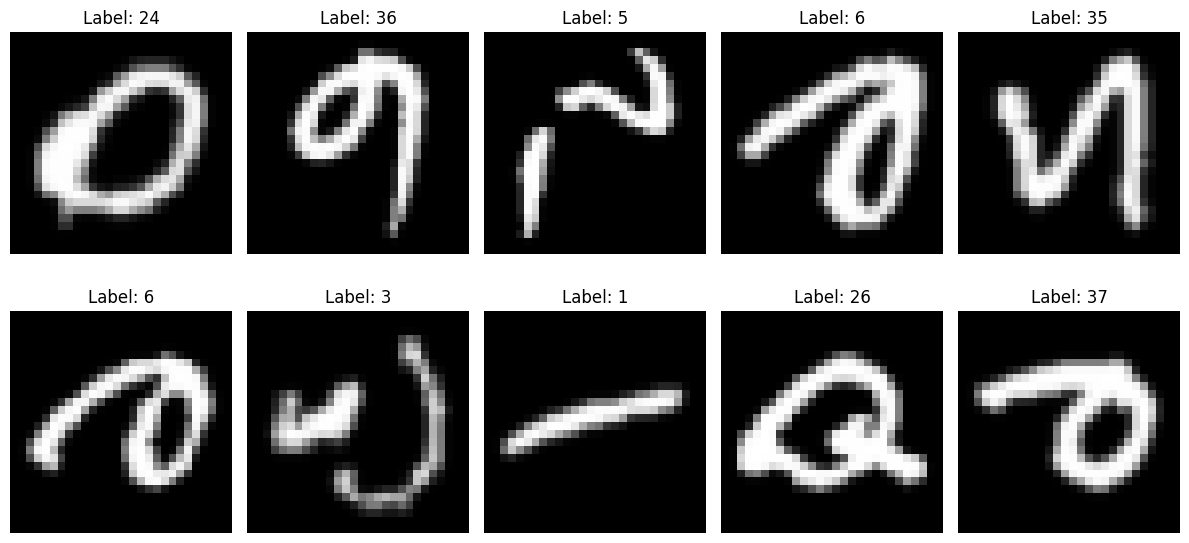

In [60]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_images[i], cmap='gray')
    axes[i].set_title(f'Label: {y_images[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Valores únicos: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Cantidad de clases: 47

Primeros 20 valores: [24 36  5  6 35  6  3  1 26 37 39  5  3  7 38 14 28  6 36 46]

=== Distribución de clases ===
Clase 0: 40263 imágenes (4.97%)
Clase 1: 44604 imágenes (5.51%)
Clase 2: 39972 imágenes (4.94%)
Clase 3: 41012 imágenes (5.07%)
Clase 4: 39054 imágenes (4.82%)
Clase 5: 36506 imágenes (4.51%)
Clase 6: 39837 imágenes (4.92%)
Clase 7: 41793 imágenes (5.16%)
Clase 8: 39479 imágenes (4.88%)
Clase 9: 39433 imágenes (4.87%)
Clase 10: 7369 imágenes (0.91%)
Clase 11: 4426 imágenes (0.55%)
Clase 12: 15019 imágenes (1.86%)
Clase 13: 5241 imágenes (0.65%)
Clase 14: 5685 imágenes (0.70%)
Clase 15: 10522 imágenes (1.30%)
Clase 16: 2864 imágenes (0.35%)
Clase 17: 3573 imágenes (0.44%)
Clase 18: 17046 imágenes (2.11%)
Clase 19: 6501 imágenes (0.80%)
Clase 20: 5707 imágenes (0.70%)
Clase 21: 23639 imágenes (

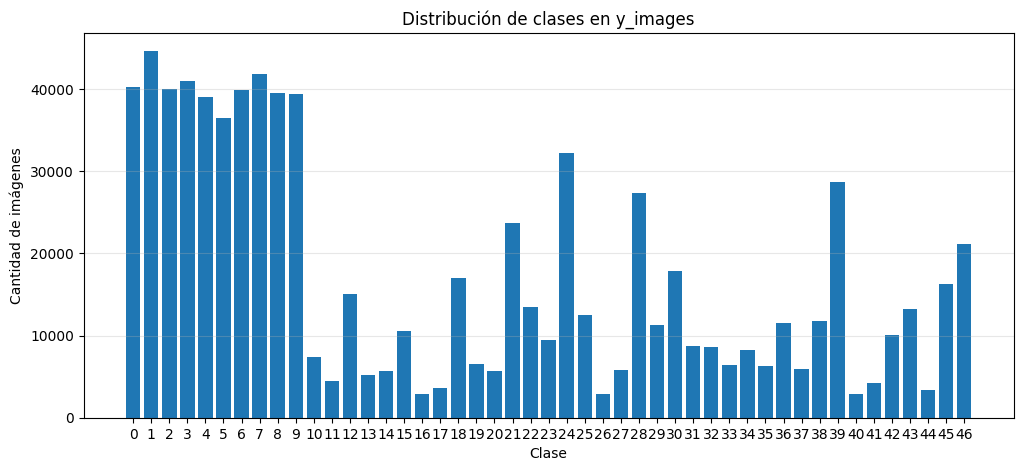

In [61]:

print(f"Valores únicos: {np.unique(y_images)}")
print(f"Cantidad de clases: {len(np.unique(y_images))}")
print(f"\nPrimeros 20 valores: {y_images[:20]}")

unique, counts = np.unique(y_images, return_counts=True)
print("\n=== Distribución de clases ===")
for label, count in zip(unique, counts):
    print(f"Clase {label}: {count} imágenes ({count/len(y_images)*100:.2f}%)")

# Visualizar la distribución
plt.figure(figsize=(12, 5))
plt.bar(unique, counts)
plt.xlabel('Clase')
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución de clases en y_images')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 1. Análisis y Preprocesamiento de Datos

## 1.a) Visualización de imágenes del dataset

=== Visualización de 3 imágenes del dataset ===

Imagen 0: Shape (28, 28), Min=0, Max=255, Clase=24
Imagen 1: Shape (28, 28), Min=0, Max=255, Clase=36
Imagen 2: Shape (28, 28), Min=0, Max=255, Clase=5


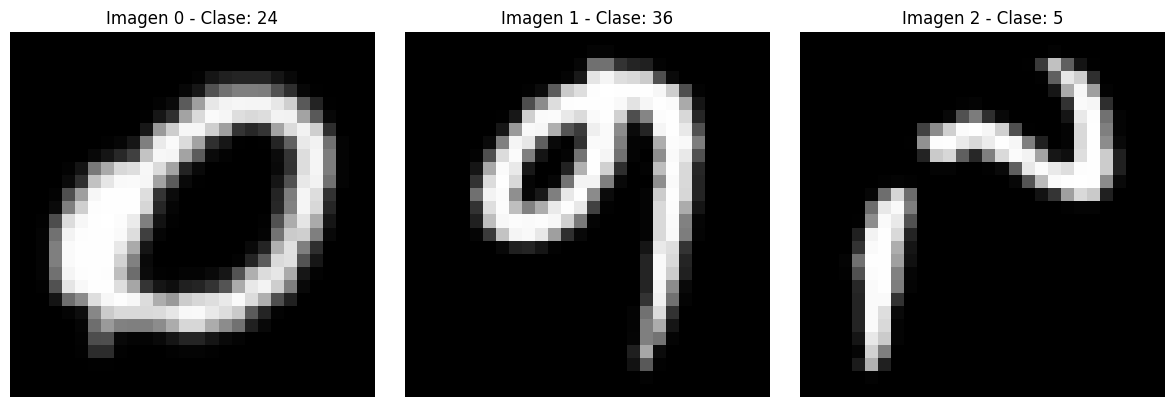

In [62]:
# Visualizar al menos 3 imágenes como pide el ejercicio
print("=== Visualización de 3 imágenes del dataset ===\n")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    img = X_images[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Imagen {i} - Clase: {y_images[i]}')
    axes[i].axis('off')
    print(f"Imagen {i}: Shape {img.shape}, Min={img.min()}, Max={img.max()}, Clase={y_images[i]}")

plt.tight_layout()
plt.show()

## 1.b) División del dataset en Train, Validation y Test

In [63]:
# División del dataset
# Proporciones: 70% Train, 15% Validation, 15% Test

np.random.seed(42)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = X_images.shape[0]
indices = np.random.permutation(n_samples)

# Calcular tamaños
train_size = int(0.7 * n_samples)
val_size = int(0.15 * n_samples)
test_size = n_samples - train_size - val_size

# Dividir índices
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Crear subconjuntos
X_train = X_images[train_indices]
y_train = y_images[train_indices]

X_val = X_images[val_indices]
y_val = y_images[val_indices]

X_test = X_images[test_indices]
y_test = y_images[test_indices]

print("=== División del dataset ===")
print(f"Train: {X_train.shape[0]} muestras ({X_train.shape[0]/n_samples*100:.1f}%)")
print(f"Validation: {X_val.shape[0]} muestras ({X_val.shape[0]/n_samples*100:.1f}%)")
print(f"Test: {X_test.shape[0]} muestras ({X_test.shape[0]/n_samples*100:.1f}%)")
print(f"Total: {n_samples} muestras")

=== División del dataset ===
Train: 566688 muestras (70.0%)
Validation: 121433 muestras (15.0%)
Test: 121434 muestras (15.0%)
Total: 809555 muestras


## 1.c) Normalización de los datos

In [64]:
# Normalizar dividiendo por 255 para que el máximo sea 1
print("=== Antes de la normalización ===")
print(f"X_train - Min: {X_train.min()}, Max: {X_train.max()}")
print(f"X_val - Min: {X_val.min()}, Max: {X_val.max()}")
print(f"X_test - Min: {X_test.min()}, Max: {X_test.max()}")

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print("\n=== Después de la normalización ===")
print(f"X_train - Min: {X_train.min():.4f}, Max: {X_train.max():.4f}")
print(f"X_val - Min: {X_val.min():.4f}, Max: {X_val.max():.4f}")
print(f"X_test - Min: {X_test.min():.4f}, Max: {X_test.max():.4f}")

# Reshape para que sean vectores (flatten) - necesario para MLP
# De (n_samples, 28, 28) a (n_samples, 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("\n=== Después del reshape para MLP ===")
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_val_flat shape: {X_val_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

# Transponer para que tenga formato (features, samples) como espera nuestro MLP
X_train_T = X_train_flat.T
X_val_T = X_val_flat.T
X_test_T = X_test_flat.T

print("\n=== Transposición para formato (features, samples) ===")
print(f"X_train_T shape: {X_train_T.shape} - (features={X_train_T.shape[0]}, samples={X_train_T.shape[1]})")
print(f"X_val_T shape: {X_val_T.shape}")
print(f"X_test_T shape: {X_test_T.shape}")

=== Antes de la normalización ===
X_train - Min: 0, Max: 255
X_val - Min: 0, Max: 255
X_test - Min: 0, Max: 255

=== Después de la normalización ===
X_train - Min: 0.0000, Max: 1.0000
X_val - Min: 0.0000, Max: 1.0000
X_test - Min: 0.0000, Max: 1.0000

=== Después del reshape para MLP ===
X_train_flat shape: (566688, 784)
X_val_flat shape: (121433, 784)
X_test_flat shape: (121434, 784)

=== Transposición para formato (features, samples) ===
X_train_T shape: (784, 566688) - (features=784, samples=566688)
X_val_T shape: (784, 121433)
X_test_T shape: (784, 121434)


In [65]:
# Convertir labels a one-hot encoding para cross-entropy
def to_one_hot(y, n_classes):
    """Convierte labels a formato one-hot encoding"""
    one_hot = np.zeros((n_classes, y.shape[0]))
    one_hot[y, np.arange(y.shape[0])] = 1
    return one_hot

n_classes = len(np.unique(y_images))
print(f"Número de clases: {n_classes}")

y_train_onehot = to_one_hot(y_train, n_classes)
y_val_onehot = to_one_hot(y_val, n_classes)
y_test_onehot = to_one_hot(y_test, n_classes)

print(f"\ny_train_onehot shape: {y_train_onehot.shape} - (classes={y_train_onehot.shape[0]}, samples={y_train_onehot.shape[1]})")
print(f"y_val_onehot shape: {y_val_onehot.shape}")
print(f"y_test_onehot shape: {y_test_onehot.shape}")

# Verificar que la codificación one-hot está correcta
print("\n=== Verificación de one-hot encoding ===")
print(f"Ejemplo - y_train[0] = {y_train[0]}")
print(f"One-hot correspondiente (primeras 10 posiciones): {y_train_onehot[:10, 0]}")

Número de clases: 47

y_train_onehot shape: (47, 566688) - (classes=47, samples=566688)
y_val_onehot shape: (47, 121433)
y_test_onehot shape: (47, 121434)

=== Verificación de one-hot encoding ===
Ejemplo - y_train[0] = 4
One-hot correspondiente (primeras 10 posiciones): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 2. Entrenamiento del Modelo MLP con Batch Training

In [70]:
input_size = 784 
n_classes = 47  

L = 2                  
M = [128, 64]          
batch_size = 128     
learning_rate = 0.01   
epochs = 30            
init_method = 'glorot' 

layer_sizes = [input_size] + M + [n_classes]

mlp = MLP(n_layers=L+1, layer_sizes=layer_sizes, batch_size=batch_size, init=init_method)

## 2.c) Entrenamiento del Modelo M0

In [71]:
print("=== Iniciando entrenamiento del modelo M0 ===\n")
print(f"Arquitectura: {layer_sizes}")
print(f"Datos de entrenamiento: {X_train_T.shape[1]} muestras")
print(f"Datos de validación: {X_val_T.shape[1]} muestras")
print(f"Batch size: {batch_size}")
print(f"Learning rate: {learning_rate}")
print(f"Épocas: {epochs}\n")

import time
start_time = time.time()

history_M0 = mlp.train(
    X_train_T,  
    y_train_onehot,  
    X_val=X_val_T, 
    y_val=y_val_onehot,
    epochs=epochs, 
    learning_rate=learning_rate,
    verbose=True
)

end_time = time.time()
training_time = end_time - start_time

print(f"\n=== Entrenamiento completado ===")
print(f"Tiempo total: {training_time:.2f} segundos ({training_time/60:.2f} minutos)")
print(f"Tiempo por época: {training_time/epochs:.2f} segundos")

import cupy as cp
train_losses = [float(cp.asnumpy(loss)) if isinstance(loss, cp.ndarray) else float(loss) 
                for loss in history_M0['train_loss']]
val_losses = [float(cp.asnumpy(loss)) if isinstance(loss, cp.ndarray) else float(loss) 
              for loss in history_M0['val_loss']]

print(f"\nLoss final - Train: {train_losses[-1]:.4f}, Validation: {val_losses[-1]:.4f}")

=== Iniciando entrenamiento del modelo M0 ===

Arquitectura: [784, 128, 64, 47]
Datos de entrenamiento: 566688 muestras
Datos de validación: 121433 muestras
Batch size: 128
Learning rate: 0.01
Épocas: 30

Epoch 0/30 - LR: 0.010000 - Train Loss: 1.5323 - Val Loss: 1.0240
Epoch 10/30 - LR: 0.010000 - Train Loss: 0.4849 - Val Loss: 0.4823
Epoch 20/30 - LR: 0.010000 - Train Loss: 0.4111 - Val Loss: 0.4157


KeyboardInterrupt: 

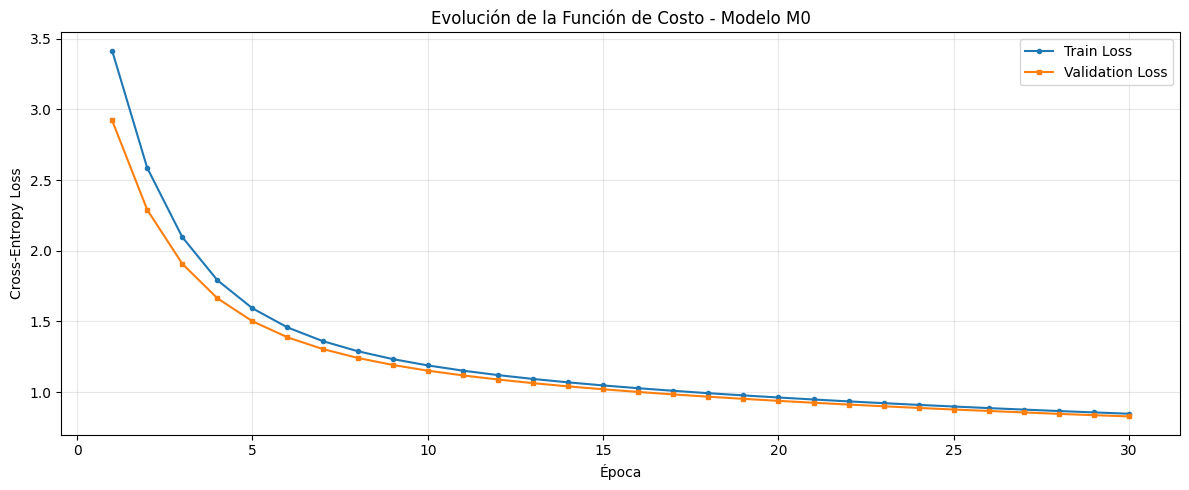

=== Análisis de Convergencia ===
Mejor loss de validación: 0.8277 en época 30
Diferencia train-val al final: 0.0189
✓ No hay evidencia de overfitting


In [ ]:
# Graficar la evolución de la función de costo
plt.figure(figsize=(12, 5))

plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o', markersize=3)
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', marker='s', markersize=3)
plt.xlabel('Época')
plt.ylabel('Cross-Entropy Loss')
plt.title('Evolución de la Función de Costo - Modelo M0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de convergencia
print("=== Análisis de Convergencia ===")
print(f"Mejor loss de validación: {min(val_losses):.4f} en época {val_losses.index(min(val_losses))+1}")
print(f"Diferencia train-val al final: {abs(train_losses[-1] - val_losses[-1]):.4f}")

# Detectar posible overfitting
if train_losses[-1] < val_losses[-1]:
    gap = val_losses[-1] - train_losses[-1]
    if gap > 0.1:
        print(f"⚠️ Posible overfitting detectado (gap: {gap:.4f})")
    else:
        print(f"✓ Gap train-val aceptable ({gap:.4f})")
else:
    print("✓ No hay evidencia de overfitting")

c:\Users\Juanjo\AppData\Local\Programs\Python\Python310\lib\site-packages\cupy\_creation\from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (3554267136 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order, blocking=blocking)



Cross-Entropy Final (Train): 0.8466
Cross-Entropy Final (Validation): 0.8277

=== Métricas en Entrenamiento (TRAIN) para M0 ===
metricas
Accuracy: 0.7551 (75.51%)
F1-Score Macro: 0.6505
Precision promedio: 0.6990
Recall promedio: 0.6349

=== Métricas en Validación (VAL) para M0 ===
metricas
Accuracy: 0.7578 (75.78%)
F1-Score Macro: 0.6516
Precision promedio: 0.7010
Recall promedio: 0.6351


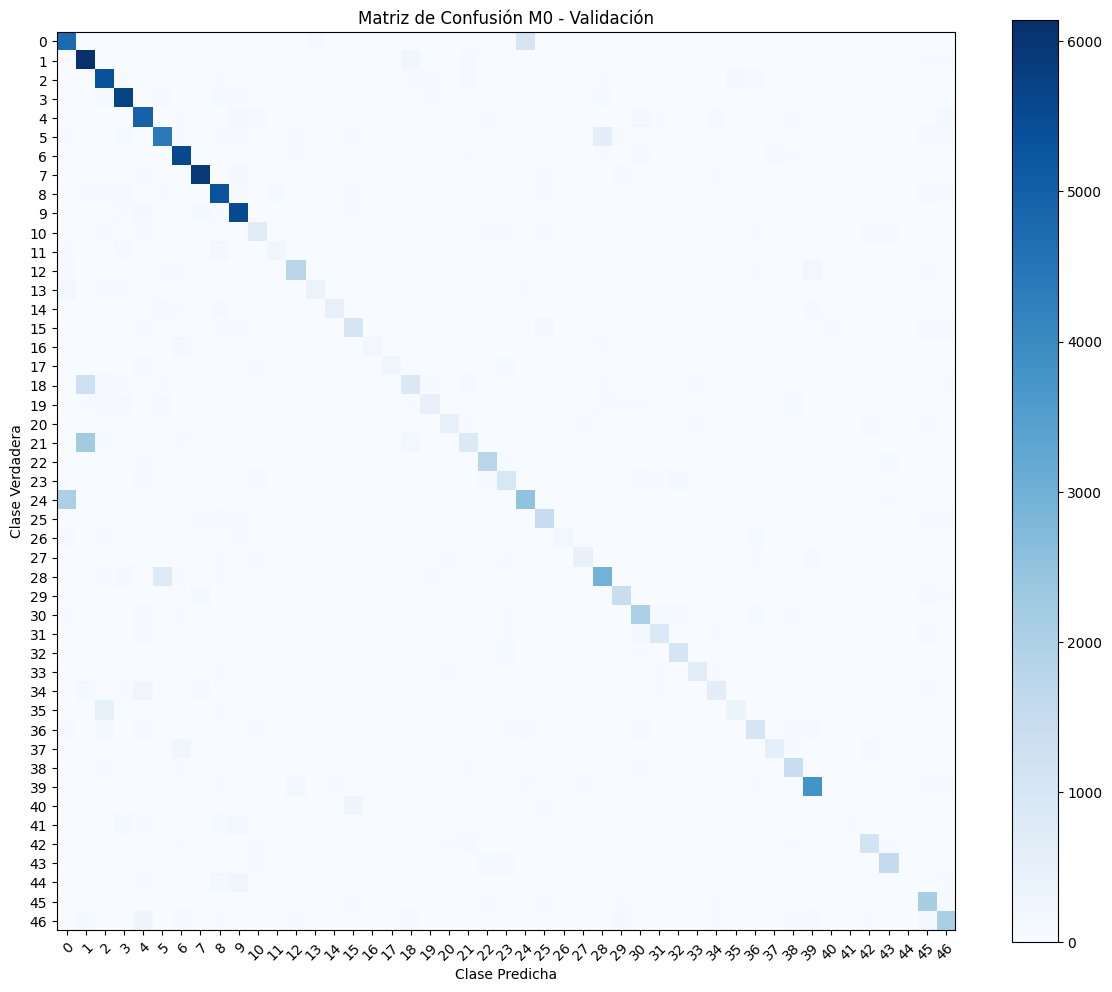

In [ ]:



y_pred_train_M0 = mlp.predict(cp.asarray(X_train_T))
y_pred_train_cpu = cp.asnumpy(y_pred_train_M0)

y_pred_val_M0 = mlp.predict(cp.asarray(X_val_T))
y_pred_val_cpu = cp.asnumpy(y_pred_val_M0)

# --- Métricas y Reporte ---

# Reportar Loss (el valor final se toma del entrenamiento en la celda 12)
# Reemplazar con los valores reales si ya ejecutaste la celda 12 y tienes el output
train_loss_final = history_M0['train_loss'][-1]
val_loss_final = history_M0['val_loss'][-1]

print(f"\nCross-Entropy Final (Train): {train_loss_final:.4f}")
print(f"Cross-Entropy Final (Validation): {val_loss_final:.4f}")

print("\n=== Métricas en Entrenamiento (TRAIN) para M0 ===")
metrics_M0_train = evaluate_model(y_train, y_pred_train_cpu, n_classes=n_classes, verbose=True)

print("\n=== Métricas en Validación (VAL) para M0 ===")
metrics_M0_val = evaluate_model(y_val, y_pred_val_cpu, n_classes=n_classes, verbose=True)

plot_confusion_matrix(metrics_M0_val['confusion_matrix'], title='Matriz de Confusión M0 - Validación')
plt.show()



# 3. Modelos Avanzados - Optimizaciones

## Uso de GPU en el Entrenamiento

### ¿El código usa GPU?
**SÍ**, el código usa GPU para:
- ✅ Almacenar pesos y biases (en CuPy)
- ✅ Forward pass (multiplicaciones matriciales)
- ✅ Backward pass (cálculo de gradientes)
- ✅ Actualización de parámetros

### ¿Dónde está el cuello de botella?
El cuello de botella está en las **transferencias CPU→GPU**:

**Datos de entrenamiento:** (784, 566688) × 8 bytes = ~3.5 GB
**GPU disponible:** 4 GB total (con ~250 MB libres)
**Problema:** ❌ No caben todos los datos en GPU de una vez

**Consecuencia:**
- Los datos permanecen en CPU (NumPy)
- En cada batch: se transfiere un mini-batch de CPU → GPU
- Overhead de transferencias repetidas

### Optimizaciones implementadas:

1. **Shuffling eficiente:** Solo se generan índices shuffled (~2 MB) en lugar de copiar todo el dataset (~3.5 GB)

2. **Opción experimental `use_gpu_cache=True`:** Intenta cachear datos en GPU (funciona con datasets pequeños)

### Uso normal (recomendado):
```python
# Los datos permanecen en CPU, se transfieren por batches
model.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot, epochs=50)
```

### Uso experimental (solo si tienes suficiente VRAM):
```python
# Intenta cachear todo en GPU (puede fallar con OOM error)
model.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot, 
            epochs=50, use_gpu_cache=True)
```

In [ ]:
# Re-inicializar modelo M0 para empezar el experimento
model_m0 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=256, optimizer='sgd')

print("\n--- 1. Rate Scheduling Lineal ---")
# Decay lineal: de 0.01 a 0.001 en 100 épocas (aunque entrenamos solo 50)
history_linear = model_m0.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                epochs=50, learning_rate=0.01,
                                lr_schedule='linear',
                                lr_schedule_params={'final_lr': 0.001, 'total_epochs': 100})

# Re-inicializar modelo M0 antes del siguiente experimento
model_m0.initialize_parameters() 
model_m0.optimizer = 'sgd' # Asegurar SGD si se usa el mismo objeto

print("\n--- 2. Rate Scheduling Exponencial ---")
# Decay exponencial: LR se multiplica por 0.96 en cada época
history_exp = model_m0.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                             epochs=50, learning_rate=0.01,
                             lr_schedule='exponential',
                             lr_schedule_params={'decay_rate': 0.96})


--- 1. Rate Scheduling Lineal ---
Epoch 0/50 - LR: 0.010000 - Train Loss: 3.7003 - Val Loss: 3.4952


KeyboardInterrupt: 

In [ ]:
# ============================================================================
# EXPERIMENTO: Comparación de diferentes técnicas de optimización
# ============================================================================
# Todos los modelos usan la misma arquitectura: [784, 128, 64, 47]
# Se comparan: SGD, Learning Rate Scheduling, Adam, L2 Regularization, Early Stopping

print("="*80)
print("INICIO DE EXPERIMENTOS - Entrenamiento de modelos con diferentes optimizaciones")
print("="*80)
print(f"\nDatos de entrenamiento: {X_train_T.shape}")
print(f"Datos de validación: {X_val_T.shape}")
print(f"\nNOTA: Los datos se transferirán automáticamente a GPU al inicio de cada entrenamiento\n")

# ----------------------------------------------------------------------------
# 1. Modelo Base M0 - SGD sin optimizaciones
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("1. MODELO M0 - Baseline (SGD sin optimizaciones)")
print("="*80)
model_m0 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=256, optimizer='sgd')
history_m0 = model_m0.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot, 
                            epochs=50, learning_rate=0.01, verbose=True)

# ----------------------------------------------------------------------------
# 2. Learning Rate Scheduling Lineal
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("2. LEARNING RATE SCHEDULING LINEAL")
print("="*80)
print("Decay lineal: LR va de 0.01 a 0.001 en 100 épocas (entrenamos 50)\n")
model_linear = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                   batch_size=256, optimizer='sgd')
history_linear = model_linear.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                    epochs=50, learning_rate=0.01,
                                    lr_schedule='linear',
                                    lr_schedule_params={'final_lr': 0.001, 'total_epochs': 100},
                                    verbose=True)

# ----------------------------------------------------------------------------
# 3. Learning Rate Scheduling Exponencial
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3. LEARNING RATE SCHEDULING EXPONENCIAL")
print("="*80)
print("Decay exponencial: LR se multiplica por 0.96 en cada época\n")
model_exp = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                batch_size=256, optimizer='sgd')
history_exp = model_exp.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                              epochs=50, learning_rate=0.01,
                              lr_schedule='exponential',
                              lr_schedule_params={'decay_rate': 0.96},
                              verbose=True)

# ----------------------------------------------------------------------------
# 4. Optimizador Adam
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("4. OPTIMIZADOR ADAM")
print("="*80)
model_adam = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                 batch_size=256, optimizer='adam')
history_adam = model_adam.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                epochs=50, learning_rate=0.001, verbose=True)

# ----------------------------------------------------------------------------
# 5. Regularización L2
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("5. REGULARIZACIÓN L2")
print("="*80)
print("Lambda = 0.01\n")
model_l2 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=256, optimizer='sgd')
history_l2 = model_l2.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                            epochs=50, learning_rate=0.01,
                            lambda_reg=0.01, verbose=True)

# ----------------------------------------------------------------------------
# 6. Early Stopping
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("6. EARLY STOPPING")
print("="*80)
print("Patience = 15 épocas\n")
model_es = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=256, optimizer='sgd')
history_es = model_es.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                            epochs=50, learning_rate=0.01,
                            early_stopping_patience=15, verbose=True)

# ----------------------------------------------------------------------------
# 7. Modelo M1 - Combinando TODAS las optimizaciones
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("7. MODELO M1 - Combinación de TODAS las optimizaciones")
print("="*80)
print("Adam + LR Exponencial + L2 Regularization + Early Stopping\n")
model_m1 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=256, optimizer='adam')
history_m1 = model_m1.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                            epochs=50, learning_rate=0.001,
                            lr_schedule='exponential',
                            lr_schedule_params={'decay_rate': 0.95},
                            lambda_reg=0.001,
                            early_stopping_patience=20, verbose=True)

print("\n" + "="*80)
print("TODOS LOS ENTRENAMIENTOS COMPLETADOS")
print("="*80)

## Comparación de Modelos - Tabla de Métricas

In [ ]:
# ============================================================================
# EVALUACIÓN Y COMPARACIÓN DE TODOS LOS MODELOS
# ============================================================================

def evaluate_model_metrics(model, X_val, y_val_onehot, y_val_true, history, model_name):
    """
    Evalúa un modelo y retorna sus métricas principales
    """
    # Hacer predicciones (transferir a GPU solo para predicción)
    y_pred = model.predict(cp.asarray(X_val))
    y_pred_cpu = cp.asnumpy(y_pred)
    
    # Calcular métricas
    acc = accuracy(y_val_true, y_pred_cpu)
    f1_macro, _ = f1_score_macro(y_val_true, y_pred_cpu, n_classes=47)
    precision, recall = precision_recall_per_class(y_val_true, y_pred_cpu, n_classes=47)
    
    # Obtener loss final
    final_train_loss = history['train_loss'][-1]
    final_val_loss = history['val_loss'][-1]
    
    # Calcular número de épocas reales (puede ser menor si hubo early stopping)
    num_epochs = len(history['train_loss'])
    
    return {
        'Modelo': model_name,
        'Train Loss': f"{final_train_loss:.4f}",
        'Val Loss': f"{final_val_loss:.4f}",
        'Accuracy': f"{acc:.4f}",
        'F1-Score': f"{f1_macro:.4f}",
        'Precision': f"{np.mean(precision):.4f}",
        'Recall': f"{np.mean(recall):.4f}",
        'Épocas': num_epochs
    }

# Lista para almacenar las métricas de todos los modelos
models_metrics = []

# Evaluar cada modelo
print("="*80)
print("EVALUANDO TODOS LOS MODELOS EN CONJUNTO DE VALIDACIÓN")
print("="*80 + "\n")

# IMPORTANTE: Usar los modelos correctos creados en la celda anterior
models_to_evaluate = [
    (model_m0, history_m0, "M0 - Baseline (SGD)"),
    (model_linear, history_linear, "LR Scheduling Lineal"),
    (model_exp, history_exp, "LR Scheduling Exponencial"),
    (model_adam, history_adam, "Adam"),
    (model_l2, history_l2, "L2 Regularization"),
    (model_es, history_es, "Early Stopping"),
    (model_m1, history_m1, "M1 - Completo (Adam+LR+L2+ES)")
]

for model, history, name in models_to_evaluate:
    print(f"Evaluando: {name}...")
    metrics = evaluate_model_metrics(model, X_val_T, y_val_onehot, y_val, history, name)
    models_metrics.append(metrics)

# Crear DataFrame con las métricas
metrics_df = pd.DataFrame(models_metrics)

print("\n" + "="*100)
print("TABLA COMPARATIVA DE MODELOS")
print("="*100)
print(metrics_df.to_string(index=False))
print("="*100)

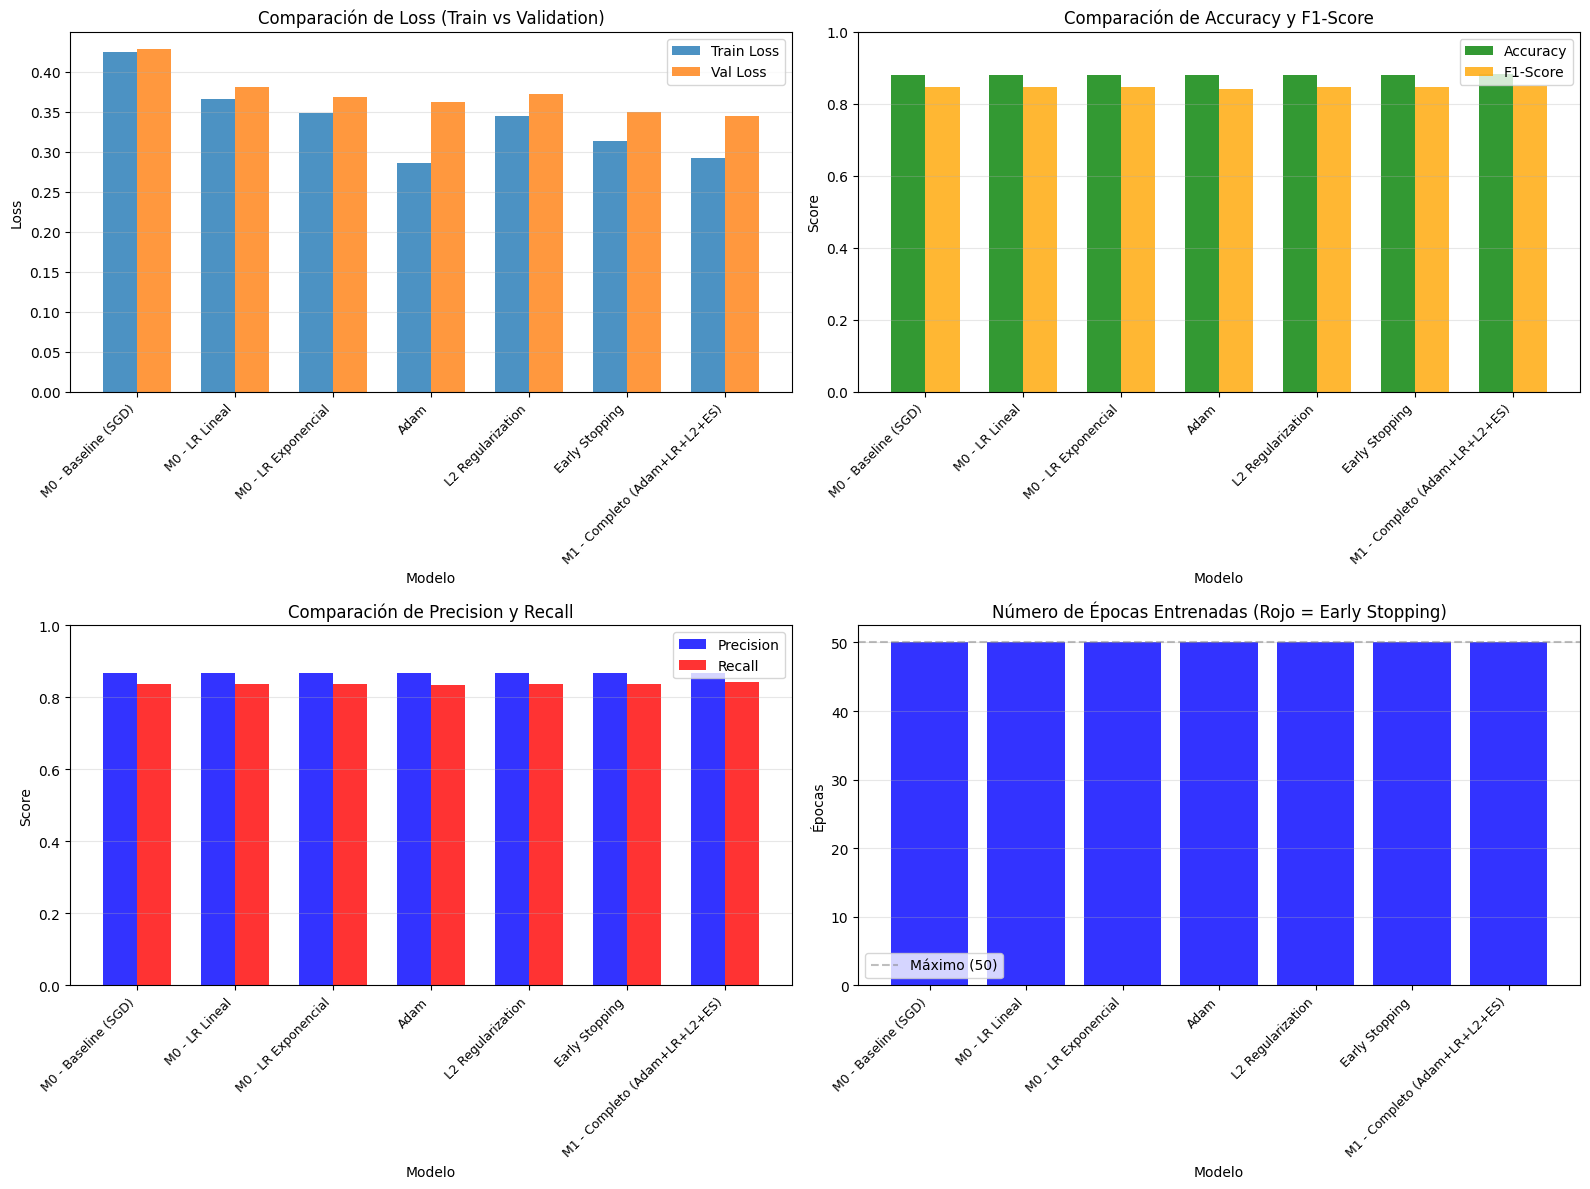


MEJORES MODELOS POR MÉTRICA
Mejor Accuracy: M1 - Completo (Adam+LR+L2+ES) (0.8828)
Mejor F1-Score: M1 - Completo (Adam+LR+L2+ES) (0.8497)
Menor Val Loss: M1 - Completo (Adam+LR+L2+ES) (0.3449)
Mejor Precision: M0 - Baseline (SGD) (0.8689)
Mejor Recall: M1 - Completo (Adam+LR+L2+ES) (0.8429)


In [ ]:
# Visualización gráfica de la comparación de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Convertir columnas numéricas de string a float para graficar
metrics_df_plot = metrics_df.copy()
for col in ['Train Loss', 'Val Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall']:
    metrics_df_plot[col] = metrics_df_plot[col].astype(float)

# 1. Comparación de Losses
ax = axes[0, 0]
x = np.arange(len(metrics_df_plot))
width = 0.35
ax.bar(x - width/2, metrics_df_plot['Train Loss'], width, label='Train Loss', alpha=0.8)
ax.bar(x + width/2, metrics_df_plot['Val Loss'], width, label='Val Loss', alpha=0.8)
ax.set_xlabel('Modelo')
ax.set_ylabel('Loss')
ax.set_title('Comparación de Loss (Train vs Validation)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# 2. Comparación de Accuracy y F1-Score
ax = axes[0, 1]
x = np.arange(len(metrics_df_plot))
width = 0.35
ax.bar(x - width/2, metrics_df_plot['Accuracy'], width, label='Accuracy', alpha=0.8, color='green')
ax.bar(x + width/2, metrics_df_plot['F1-Score'], width, label='F1-Score', alpha=0.8, color='orange')
ax.set_xlabel('Modelo')
ax.set_ylabel('Score')
ax.set_title('Comparación de Accuracy y F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 3. Comparación de Precision y Recall
ax = axes[1, 0]
x = np.arange(len(metrics_df_plot))
width = 0.35
ax.bar(x - width/2, metrics_df_plot['Precision'], width, label='Precision', alpha=0.8, color='blue')
ax.bar(x + width/2, metrics_df_plot['Recall'], width, label='Recall', alpha=0.8, color='red')
ax.set_xlabel('Modelo')
ax.set_ylabel('Score')
ax.set_title('Comparación de Precision y Recall')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 4. Número de épocas entrenadas
ax = axes[1, 1]
colors = ['red' if e < 50 else 'blue' for e in metrics_df_plot['Épocas']]
ax.bar(x, metrics_df_plot['Épocas'], alpha=0.8, color=colors)
ax.set_xlabel('Modelo')
ax.set_ylabel('Épocas')
ax.set_title('Número de Épocas Entrenadas (Rojo = Early Stopping)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Máximo (50)')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar el mejor modelo según diferentes métricas
print("\n" + "="*100)
print("MEJORES MODELOS POR MÉTRICA")
print("="*100)
print(f"Mejor Accuracy: {metrics_df_plot.loc[metrics_df_plot['Accuracy'].idxmax(), 'Modelo']} ({metrics_df_plot['Accuracy'].max():.4f})")
print(f"Mejor F1-Score: {metrics_df_plot.loc[metrics_df_plot['F1-Score'].idxmax(), 'Modelo']} ({metrics_df_plot['F1-Score'].max():.4f})")
print(f"Menor Val Loss: {metrics_df_plot.loc[metrics_df_plot['Val Loss'].idxmin(), 'Modelo']} ({metrics_df_plot['Val Loss'].min():.4f})")
print(f"Mejor Precision: {metrics_df_plot.loc[metrics_df_plot['Precision'].idxmax(), 'Modelo']} ({metrics_df_plot['Precision'].max():.4f})")
print(f"Mejor Recall: {metrics_df_plot.loc[metrics_df_plot['Recall'].idxmax(), 'Modelo']} ({metrics_df_plot['Recall'].max():.4f})")
print("="*100)

# 4

TODO GEMINI, REVISAR Y ORDENAR

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import cupy as cp # Keep for potential comparison data loading if needed
import time # To measure training time
import matplotlib.pyplot as plt

# Ensure your original data (numpy arrays before transpose) are available
# X_train_flat, y_train, X_val_flat, y_val, X_test_flat, y_test

# Device configuration (use GPU if available in Kaggle)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

KeyboardInterrupt: 

In [ ]:
# Convert numpy arrays to PyTorch tensors - Use original (N, 784) shape
# Ensure data is float32 for features and long (int64) for labels
X_train_torch = torch.tensor(X_train_flat.astype(np.float32)).to(device)
y_train_torch = torch.tensor(y_train.astype(np.int64)).to(device) # Use original labels (indices)

X_val_torch = torch.tensor(X_val_flat.astype(np.float32)).to(device)
y_val_torch = torch.tensor(y_val.astype(np.int64)).to(device)

X_test_torch = torch.tensor(X_test_flat.astype(np.float32)).to(device)
y_test_torch = torch.tensor(y_test.astype(np.int64)).to(device)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# Create DataLoaders
batch_size_pytorch = 128 # Match M1
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size_pytorch, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size_pytorch, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size_pytorch, shuffle=False)

print(f"DataLoaders created with batch size: {batch_size_pytorch}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

In [ ]:
class MLP_PyTorch(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MLP_PyTorch, self).__init__()
        layers = []
        layer_sizes = [input_size] + hidden_sizes + [num_classes]
        
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            # Add ReLU activation for all layers except the last one
            if i < len(layer_sizes) - 2:
                layers.append(nn.ReLU())
                
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Instantiate the model M2 with M1's architecture
input_size_pt = 784
hidden_sizes_pt = [128, 64]
num_classes_pt = 47

model_m2 = MLP_PyTorch(input_size_pt, hidden_sizes_pt, num_classes_pt).to(device)
print("Model M2 Architecture:")
print(model_m2)

In [ ]:
# Loss and Optimizer (Matching M1 as closely as possible)
criterion = nn.CrossEntropyLoss() # Includes Softmax
learning_rate_pt = 0.001 # As used in M1
weight_decay_pt = 0.001 # Corresponds to lambda_reg in M1
optimizer_m2 = optim.Adam(model_m2.parameters(), lr=learning_rate_pt, weight_decay=weight_decay_pt)

# Optional: Add Learning Rate Scheduler later if needed, start simple
# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Training Function
def train_model_pytorch(model, train_loader, criterion, optimizer, device):
    model.train() # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc

# Evaluation Function
def evaluate_model_pytorch(model, data_loader, criterion, device):
    model.eval() # Set model to evaluation mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_preds = []
    all_labels = []

    with torch.no_grad(): # No need to track gradients during evaluation
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc, np.array(all_labels), np.array(all_preds)

print("Loss function, optimizer, and train/eval functions defined.")

In [ ]:
num_epochs_pt = 50 # Start with the same number as M1, can adjust
history_m2 = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'lr': []}

print(f"\n--- Training Model M2 (PyTorch) for {num_epochs_pt} epochs ---")
start_time_m2 = time.time()

for epoch in range(num_epochs_pt):
    # Get current learning rate (useful if scheduler is added later)
    current_lr = optimizer_m2.param_groups[0]['lr']
    history_m2['lr'].append(current_lr)
    
    # Train for one epoch
    train_loss, train_acc = train_model_pytorch(model_m2, train_loader, criterion, optimizer_m2, device)
    
    # Evaluate on validation set
    val_loss, val_acc, _, _ = evaluate_model_pytorch(model_m2, val_loader, criterion, device)
    
    # Record history
    history_m2['train_loss'].append(train_loss)
    history_m2['train_acc'].append(train_acc)
    history_m2['val_loss'].append(val_loss)
    history_m2['val_acc'].append(val_acc)
    
    # Optional: Step the scheduler if using one
    # scheduler.step()
    
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_pt}], LR: {current_lr:.6f}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

end_time_m2 = time.time()
print(f"\n--- M2 Training Finished ---")
print(f"Total Time: {end_time_m2 - start_time_m2:.2f} seconds")

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_m2['train_loss'], label='Train Loss')
plt.plot(history_m2['val_loss'], label='Validation Loss')
plt.title('M2 Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_m2['train_acc'], label='Train Accuracy')
plt.plot(history_m2['val_acc'], label='Validation Accuracy')
plt.title('M2 Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the final M2 model on the validation set
final_val_loss_m2, final_val_acc_m2, y_val_true_m2, y_val_pred_m2 = evaluate_model_pytorch(model_m2, val_loader, criterion, device)

print("\n=== Final Metrics for Model M2 (PyTorch) on Validation Set ===")
metrics_M2_val = evaluate_model(y_val_true_m2, y_val_pred_m2, n_classes=num_classes_pt, verbose=True)
metrics_M2_val['val_loss'] = final_val_loss_m2 # Add loss for comparison table

# Retrieve M1 metrics (from the DataFrame created earlier or re-calculate)
# Assuming metrics_df contains the results from the previous section
metrics_M1_row = metrics_df[metrics_df['Modelo'] == 'M1 - Completo (Adam+LR+L2+ES)'].iloc[0]

# Create comparison DataFrame
comparison_data = {
    'Metric': ['Validation Loss', 'Accuracy', 'F1-Score Macro'],
    'M1 (Custom)': [
        float(metrics_M1_row['Val Loss']), 
        float(metrics_M1_row['Accuracy']), 
        float(metrics_M1_row['F1-Score'])
    ],
    'M2 (PyTorch)': [
        metrics_M2_val['val_loss'], 
        metrics_M2_val['accuracy'], 
        metrics_M2_val['f1_macro']
    ]
}
comparison_df = pd.DataFrame(comparison_data)

print("\n=== Comparison: M1 (Custom Implementation) vs M2 (PyTorch) ===")
print(comparison_df.to_string(index=False))

# Plot M2 Confusion Matrix
plot_confusion_matrix(metrics_M2_val['confusion_matrix'], title='Matriz de Confusión M2 (PyTorch) - Validación')
plt.show()

# Check if behaviors are similar
diff_acc = abs(comparison_df.loc[1, 'M1 (Custom)'] - comparison_df.loc[1, 'M2 (PyTorch)'])
diff_loss = abs(comparison_df.loc[0, 'M1 (Custom)'] - comparison_df.loc[0, 'M2 (PyTorch)'])

print(f"\nDifference in Accuracy: {diff_acc:.4f}")
print(f"Difference in Val Loss: {diff_loss:.4f}")

if diff_acc < 0.02 and diff_loss < 0.05: # Thresholds can be adjusted
    print("\nValidation successful: M1 and M2 performance is similar. 👍")
else:
    print("\nWarning: M1 and M2 performance differs significantly. Review implementations/hyperparameters. ⚠️")